# CS418 Final Project: Energy Usage
## Arpita Kumari, Kaveesha Weerasiri, Reem Hussein
Description: The problem we will be focusing on is to predict the total kWh in Chicago in 2010 for different communities. We want to see what communities have the highest total kWh in Chicago based on the total units.

In [223]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import math

In [224]:
#importing the data set
energy_data = pd.read_csv("energy_usage.csv")
energy_data.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [225]:
# clean up the data
energy_data.describe()

,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,6.697400e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,...,67037.000000,67037.000000,67051.000000,67051.000000,67037.000000,67037.000000,64606.000000,67037.000000,64433.000000,67037.000000
mean,1.703140e+14,1.758159e+04,1.737651e+04,1.624212e+04,1.595696e+04,1.906623e+04,2.300485e+04,2.482891e+04,2.267526e+04,1.856410e+04,...,105.180169,48.375897,1.887592,71.593006,3.454721,42.347495,0.880365,25.438952,0.511679,42.347495
std,2.776392e+09,3.482508e+05,3.351910e+05,3.164713e+05,3.118232e+05,3.634429e+05,3.988582e+05,4.135955e+05,3.940989e+05,3.486212e+05,...,801.339175,426.941305,1.957215,34.168384,26.146208,371.024953,0.130937,251.193571,0.288431,371.024953
min,1.703101e+14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.703116e+14,1.370000e+03,1.613000e+03,1.586000e+03,1.579000e+03,1.957000e+03,2.700000e+03,3.203000e+03,2.837750e+03,2.027000e+03,...,37.000000,15.000000,1.140000,53.000000,2.150000,13.000000,0.833200,3.000000,0.286000,13.000000
50%,1.703133e+14,3.481500e+03,3.814000e+03,3.681500e+03,3.646000e+03,4.528000e+03,6.295000e+03,7.389000e+03,6.413500e+03,4.573000e+03,...,64.000000,25.000000,1.750000,80.000000,2.700000,22.000000,0.914600,11.000000,0.537900,22.000000
75%,1.703167e+14,7.157000e+03,7.410250e+03,7.059000e+03,7.010000e+03,8.943500e+03,1.282850e+04,1.465750e+04,1.229800e+04,8.634000e+03,...,105.000000,42.000000,2.000000,96.500000,3.320000,37.000000,0.967700,23.000000,0.733000,37.000000
max,1.703198e+14,5.298534e+07,4.787976e+07,4.413646e+07,4.222055e+07,4.861925e+07,5.256908e+07,5.513983e+07,5.158912e+07,4.450386e+07,...,67388.000000,51372.000000,110.000000,158.000000,2061.920000,43222.000000,1.000000,28335.000000,1.000000,43222.000000


In [226]:
energy_data.dtypes

COMMUNITY AREA NAME                    object
CENSUS BLOCK                          float64
BUILDING TYPE                          object
BUILDING_SUBTYPE                       object
KWH JANUARY 2010                      float64
                                       ...   
OCCUPIED UNITS                        float64
OCCUPIED UNITS PERCENTAGE             float64
RENTER-OCCUPIED HOUSING UNITS         float64
RENTER-OCCUPIED HOUSING PERCENTAGE    float64
OCCUPIED HOUSING UNITS                float64
Length: 73, dtype: object

In [227]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   COMMUNITY AREA NAME                  67051 non-null  object 
 1   CENSUS BLOCK                         66974 non-null  float64
 2   BUILDING TYPE                        66974 non-null  object 
 3   BUILDING_SUBTYPE                     66974 non-null  object 
 4   KWH JANUARY 2010                     66180 non-null  float64
 5   KWH FEBRUARY 2010                    66180 non-null  float64
 6   KWH MARCH 2010                       66180 non-null  float64
 7   KWH APRIL 2010                       66180 non-null  float64
 8   KWH MAY 2010                         66180 non-null  float64
 9   KWH JUNE 2010                        66180 non-null  float64
 10  KWH JULY 2010                        66180 non-null  float64
 11  KWH AUGUST 2010             

In [228]:
print('Number of missing values per column:')
missing_values = energy_data.isin([0]).sum()
missing_values[0:36]

Number of missing values per column:


COMMUNITY AREA NAME         0
CENSUS BLOCK                0
BUILDING TYPE               0
BUILDING_SUBTYPE            0
KWH JANUARY 2010         3069
KWH FEBRUARY 2010        1359
KWH MARCH 2010           1036
KWH APRIL 2010            865
KWH MAY 2010              683
KWH JUNE 2010             542
KWH JULY 2010             427
KWH AUGUST 2010           314
KWH SEPTEMBER 2010        206
KWH OCTOBER 2010          108
KWH NOVEMBER 2010          50
KWH DECEMBER 2010          41
TOTAL KWH                   0
ELECTRICITY ACCOUNTS        0
ZERO KWH ACCOUNTS       14965
THERM JANUARY 2010          0
THERM FEBRUARY 2010         0
THERM MARCH 2010            0
TERM APRIL 2010             0
THERM MAY 2010              0
THERM JUNE 2010             0
THERM JULY 2010             0
THERM AUGUST 2010           0
THERM SEPTEMBER 2010        0
THERM OCTOBER 2010          0
THERM NOVEMBER 2010         0
THERM DECEMBER 2010         0
TOTAL THERMS                0
GAS ACCOUNTS                0
KWH TOTAL 

In [229]:
missing_values[36:73]

KWH STANDARD DEVIATION 2010              12
KWH MINIMUM 2010                          0
KWH 1ST QUARTILE 2010                     0
KWH 2ND QUARTILE 2010                     0
KWH 3RD QUARTILE 2010                     0
KWH MAXIMUM 2010                          0
KWH SQFT MEAN 2010                        0
KWH SQFT STANDARD DEVIATION 2010        866
KWH SQFT MINIMUM 2010                     0
KWH SQFT 1ST QUARTILE 2010                0
KWH SQFT 2ND QUARTILE 2010                0
KWH SQFT 3RD QUARTILE 2010                0
KWH SQFT MAXIMUM 2010                     0
THERM MEAN 2010                           0
THERM STANDARD DEVIATION 2010            18
THERM MINIMUM 2010                        0
THERM 1ST QUARTILE 2010                   0
THERM 2ND QUARTILE 2010                   0
THERM 3RD QUARTILE 2010                   0
THERM MAXIMUM 2010                        0
THERMS SQFT MEAN 2010                     0
THERMS SQFT STANDARD DEVIATION 2010     883
THERMS SQFT MINIMUM 2010        

## There are missing values for the following columns

KWH JANUARY 2010                      3069

KWH FEBRUARY 2010                     1359

KWH MARCH 2010                        1036

KWH APRIL 2010                         865

KWH MAY 2010                           683

KWH JUNE 2010                          542

KWH JULY 2010                          427

KWH AUGUST 2010                        314

KWH SEPTEMBER 2010                     206

KWH OCTOBER 2010                       108

KWH NOVEMBER 2010                       50

KWH DECEMBER 2010                       41

ZERO KWH ACCOUNTS                    14965

KWH STANDARD DEVIATION 2010             12

KWH SQFT STANDARD DEVIATION 2010       866

THERM STANDARD DEVIATION 2010           18

THERMS SQFT STANDARD DEVIATION 2010    883

TOTAL POPULATION                      2525

TOTAL UNITS                           2431

AVERAGE BUILDING AGE                  5309

AVERAGE HOUSESIZE                     2604

OCCUPIED UNITS                        2604

OCCUPIED UNITS PERCENTAGE              173

RENTER-OCCUPIED HOUSING UNITS         6726

RENTER-OCCUPIED HOUSING PERCENTAGE    4122

OCCUPIED HOUSING UNITS                2604

'ZERO KWH ACCOUNTS' variable should be removed from the data set, because more than a fifth of the values are missing. We can't remove the observations since there are so many missing, so we should just remove the variable to work with the information. We removed the rest of the observations that had NA as a value.

In [230]:
energy_data = energy_data.drop('ZERO KWH ACCOUNTS',  axis=1)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
energy_data = energy_data.dropna()

In [231]:
print("Summary statistics for all numerical features")
energy_data.describe(include=['number'])

Summary statistics for all numerical features


,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,4.588400e+04,...,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000
mean,1.703141e+14,9.029018e+03,9.071388e+03,8.538137e+03,8.404627e+03,1.055940e+04,1.410426e+04,1.579704e+04,1.370600e+04,1.023804e+04,...,85.454298,37.660579,1.727001,75.073613,2.901079,33.262510,0.888389,18.719968,0.471502,33.262510
std,2.734253e+09,7.379044e+04,6.762500e+04,5.733466e+04,5.567833e+04,6.564409e+04,7.410903e+04,9.261221e+04,8.237442e+04,6.578083e+04,...,85.259304,54.831089,1.135246,28.259171,0.837439,48.591219,0.116450,36.283273,0.285204,48.591219
min,1.703101e+14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.043500,0.000000,0.000000,1.000000
25%,1.703116e+14,2.186000e+03,2.524000e+03,2.459000e+03,2.432000e+03,3.008000e+03,4.191000e+03,4.946000e+03,4.288000e+03,3.045000e+03,...,41.000000,16.000000,1.180000,57.500000,2.300000,14.000000,0.842100,3.000000,0.231000,14.000000
50%,1.703141e+14,4.442000e+03,4.844500e+03,4.680500e+03,4.635000e+03,5.801000e+03,8.209000e+03,9.559000e+03,8.091000e+03,5.730500e+03,...,65.000000,25.000000,1.650000,79.630000,2.820000,22.000000,0.917400,10.000000,0.500000,22.000000
75%,1.703166e+14,7.833000e+03,8.075250e+03,7.682250e+03,7.631250e+03,9.813250e+03,1.429600e+04,1.627500e+04,1.353750e+04,9.433250e+03,...,103.000000,41.000000,2.000000,95.330000,3.410000,36.000000,0.971400,21.000000,0.692000,36.000000
max,1.703184e+14,1.013538e+07,9.513220e+06,7.169960e+06,7.137167e+06,8.842112e+06,1.042817e+07,1.525210e+07,1.315616e+07,9.322770e+06,...,1496.000000,1365.000000,50.500000,153.500000,12.000000,1034.000000,1.000000,993.000000,1.000000,1034.000000


In [232]:
print("Summary statistics for all categorical features")
energy_data.describe(exclude=['number'])

Summary statistics for all categorical features


,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,ELECTRICITY ACCOUNTS,GAS ACCOUNTS
count,45884,45884,45884,45884,45884
unique,77,3,6,273,150
top,Austin,Residential,Single Family,Less than 4,Less than 4
freq,1895,39975,23449,3936,4424


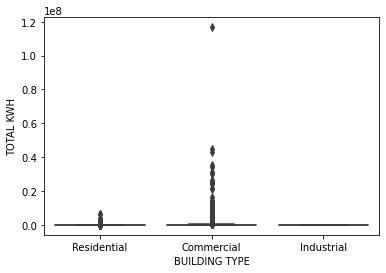

In [233]:
sns.boxplot(x="BUILDING TYPE", y=energy_data['TOTAL KWH'], data=energy_data)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'building type'),
 Text(0.5, 1.0, 'Number of each type of building')]

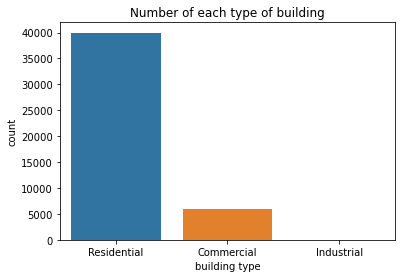

In [234]:
ax = sns.countplot(x = "BUILDING TYPE", data = energy_data)
ax.set(title = 'Number of each type of building', xlabel = 'building type', ylabel = 'count')

([<matplotlib.patches.Wedge at 0x7fa6e9dc7190>,
 [Text(-1.01119533891774, 0.43299421075926287, 'Residential'),
  Text(1.011136060193045, -0.4331326214651663, 'Commercial'),
  Text(1.0999999897029031, -0.00015051117292544288, 'Industrial')])

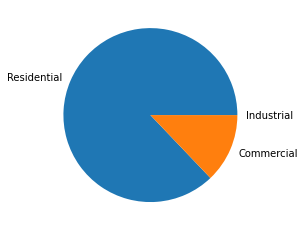

In [235]:
# translate the types of buildings to numbers
# Residential = 0
# Commerical = 1
# Industrial = 2

energy_altered_data = energy_data
type_buildings = ['Residential', 'Commercial', 'Industrial']
building_mappings = {'Residential' : 0, 'Commercial' : 1, 'Industrial' : 2}

energy_altered_data['BUILDING TYPE'] = energy_altered_data['BUILDING TYPE'].map(building_mappings)

In [ ]:
# create the pie chart 
num_residential = len(energy_altered_data[energy_altered_data['BUILDING TYPE'] == 0])
num_commerical = len(energy_altered_data[energy_altered_data['BUILDING TYPE'] == 1])
num_industrial = len(energy_altered_data[energy_altered_data['BUILDING TYPE'] == 2])
total_buildings= len(energy_altered_data['BUILDING TYPE'])

# compute the size of each type of building

sizes = [num_residential/total_buildings, num_commerical/total_buildings, num_industrial/total_buildings]
#energy_altered_data.head()
plt.pie(sizes, labels = type_buildings, explode = None)
plt.title('Building Type')
plt.axis('equal')

## Creating dummy variables for linear regression

In [216]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
energy_data['BUILDING TYPE'] = pd.get_dummies(energy_data['BUILDING TYPE'])
energy_data['BUILDING_SUBTYPE'] = pd.get_dummies(energy_data['BUILDING_SUBTYPE'])
energy_data['ELECTRICITY ACCOUNTS'] = pd.get_dummies(energy_data['ELECTRICITY ACCOUNTS'])
energy_data['GAS ACCOUNTS'] = pd.get_dummies(energy_data['GAS ACCOUNTS'])
energy_data['COMMUNITY AREA NAME'] = pd.get_dummies(energy_data['COMMUNITY AREA NAME'])

In [167]:
# energy_data = energy_data.dropna(subset=['CENSUS BLOCK'])
# energy_data['CENSUS BLOCK'] = energy_data['CENSUS BLOCK'].astype(int)
# areas = energy_data['BUILDING_SUBTYPE'].tolist()
# total_kwh = energy_data['TOTAL KWH'].tolist()
# figure = ff.create_choropleth(fips = areas, 
#                               values = total_kwh,
#                               title = "Total KWH used by building subtype",
#                               legend_title = "building subtype"
#                              )
# figure.layout.template = None
# figure.show()

## Set Up For Linear Regression

In [225]:
energy_data['kwh_or_therms'] = np.where(energy_data['TOTAL KWH'] > energy_data['TOTAL THERMS'], 1, 0)
energy_data.head(10)

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS,kwh_or_therms
103,0,1.703107e+14,0,0,242.0,136.0,134.0,134.0,144.0,122.0,...,22.0,4.00,12.00,2.77,22.0,1.0000,11.0,0.500,22.0,1
201,0,1.703143e+14,0,0,1266.0,1023.0,897.0,772.0,826.0,1095.0,...,159.0,2.50,114.50,1.62,138.0,0.8679,106.0,0.768,138.0,1
259,1,1.703114e+14,0,0,11921.0,12145.0,9759.0,11542.0,14348.0,26617.0,...,64.0,3.00,65.50,2.20,60.0,0.9375,33.0,0.550,60.0,1
279,0,1.703158e+14,0,0,3271.0,2117.0,1520.0,3073.0,3350.0,5737.0,...,22.0,2.00,84.00,5.00,19.0,0.8636,4.0,0.211,19.0,1
297,0,1.703168e+14,0,0,399.0,878.0,819.0,962.0,2414.0,1759.0,...,22.0,2.00,108.00,4.21,14.0,0.6364,8.0,0.571,14.0,1
307,0,1.703156e+14,1,0,1937.0,2573.0,1871.0,2138.0,2148.0,3445.0,...,3.0,1.33,18.33,2.00,1.0,0.3333,0.0,0.000,1.0,1
355,0,1.703183e+14,0,0,1852.0,2186.0,1506.0,2238.0,1907.0,2122.0,...,9.0,2.00,110.00,2.33,9.0,1.0000,6.0,0.667,9.0,1
434,0,1.703153e+14,0,0,0.0,973.0,1207.0,873.0,985.0,1322.0,...,14.0,2.00,85.00,3.29,14.0,1.0000,8.0,0.571,14.0,1
465,1,1.703114e+14,0,0,12977.0,14639.0,12718.0,14973.0,16384.0,32940.0,...,79.0,2.50,87.69,3.51,65.0,0.8228,49.0,0.754,65.0,1
468,1,1.703114e+14,0,0,4985.0,2636.0,2353.0,4761.0,4391.0,7362.0,...,70.0,2.20,87.00,3.73,62.0,0.8856,49.0,0.790,62.0,1


In [248]:
predictor_variables = energy_data.drop(['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010', 'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010', 'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010', 'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010', 'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010'],  axis=1)
x_train_comp, x_validation_comp, y_train, y_validation = train_test_split(predictor_variables, energy_data['kwh_or_therms'], test_size = 0.25, random_state = 0)

In [267]:
# Selecting variables for x_train
# x_train = x_train_comp.select_dtypes(include=[np.int64,np.float64])

# # Selecting required variables for x_validation
# x_validation = x_validation_comp.select_dtypes(include=[np.int64,np.float64])
# print(x_validation)

# # Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train_comp)
x_train_scaled = scaler.transform(x_train_comp)
x_validation_scaled = scaler.transform(x_validation_comp)
x_train_scaled_df = pd.DataFrame(x_train_scaled,index = x_train_comp.index,columns=x_train_comp.columns)
x_validation_scaled_df = pd.DataFrame(x_validation_scaled,index = x_validation_comp.index,columns=x_validation_comp.columns)

## Total kWh model

In [268]:
print("total kwh coefficient: \n")
model = linear_model.LinearRegression()
fitted_model_kwh = model.fit(X = x_train_scaled_df, y = x_train_comp['TOTAL KWH'])
print(fitted_model_kwh.coef_)
print("\n")

y_predicted = fitted_model_kwh.predict(x_validation_scaled_df)
#calculation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df.columns)
print(n)
print(p)
print(n-p-1)

#displaying the r squared for democraticTOTAL KWH
corr_coef = np.corrcoef(y_predicted,x_validation_comp['TOTAL KWH'])[1, 0]

R_squared = corr_coef ** 2
print("Coefficent of Determination:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted Coefficent of Determination:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_comp['TOTAL KWH']))
print('RMSE -',rmse)

#this is our best total kwh model!

total kwh coefficient: 

[ 1.87750779e-10  1.05501385e-10  5.82076609e-11  3.34694050e-10
  6.38675652e+05  2.61934474e-10 -8.44011083e-10 -3.27418093e-10
 -1.48429535e-09  3.78349796e-10 -4.30736691e-09  2.31375452e-09
  1.08047971e-09 -9.60426405e-10  9.45874490e-10  8.73114914e-10
 -1.54250301e-09  3.31783667e-09  1.91357685e-09  1.09139364e-10
  3.27418093e-10 -7.56699592e-10 -1.76078174e-09 -5.76619641e-10
  5.23868948e-10  3.12866177e-09  2.57568900e-09 -1.60071068e-09
 -3.34694050e-10 -1.00408215e-09 -1.89174898e-09 -8.73114914e-11
  6.91215973e-10 -8.00355338e-10  9.16770659e-10 -2.40106601e-10
 -5.60248736e-10 -9.38598532e-10  4.65661287e-10 -8.87666829e-10
 -2.32830644e-10  3.00133252e-11 -5.82076609e-11  7.27595761e-10
  8.73114914e-11  1.89174898e-10 -2.91038305e-11 -2.03726813e-10
 -1.01863407e-10]


11471
49
11421
Coefficent of Determination: 1.0
Adjusted Coefficent of Determination: 1.0
RMSE - 1.187927308032305e-09


In [269]:
print("total therms coefficient: \n")
model = linear_model.LinearRegression()
fitted_model_kwh = model.fit(X = x_train_scaled_df, y = x_train_comp['TOTAL THERMS'])
print(fitted_model_kwh.coef_)
print("\n")

y_predicted = fitted_model_kwh.predict(x_validation_scaled_df)
#calculation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df.columns)
print(n)
print(p)
print(n-p-1)

#displaying the r squared for democratic
corr_coef = np.corrcoef(y_predicted,x_validation_comp['TOTAL THERMS'])[1, 0]

R_squared = corr_coef ** 2
print("Coefficent of Determination:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted Coefficent of Determination:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_comp['TOTAL THERMS']))
print('RMSE -',rmse)

#this is our best total therms model!

total therms coefficient: 

[ 1.55062027e-11  1.37703182e-11 -2.00088834e-11  9.09494702e-13
  1.54614099e-10  2.81943358e-11  3.81565501e+04 -4.18367563e-11
 -1.72803993e-10  2.27373675e-11 -2.63753464e-10  1.11413101e-10
 -2.54658516e-11  1.00044417e-11  7.18500814e-11  7.63975549e-11
 -1.42790668e-10  6.84394763e-11  2.00543582e-10 -3.18323146e-11
  1.00953912e-10  5.45696821e-11 -8.27640179e-11  1.11413101e-10
  7.63975549e-11  3.74711817e-10  3.75621312e-10 -2.61366040e-10
 -7.82165444e-11 -7.54880602e-11 -1.63709046e-10 -1.44723344e-10
  1.55068847e-10 -1.24600774e-10  1.74622983e-10 -4.09272616e-12
 -6.43467502e-11 -1.18689059e-10 -2.36468622e-11 -1.50976120e-10
 -4.52473614e-11  3.13775672e-11  3.63797881e-12  7.91260391e-11
  1.27329258e-11 -5.00222086e-12 -3.63797881e-12  1.32786226e-10
 -5.91171556e-12]


11471
49
11421
Coefficent of Determination: 1.0
Adjusted Coefficent of Determination: 1.0
RMSE - 1.696346651863638e-10


### Model with 'TOTAL POPULATION', 'ELECTRICITY ACCOUNTS', 'BUILDING_SUBTYPE', 'BUILDING TYPE' as predictors

In [282]:
model = linear_model.LinearRegression()                

classifier_kwh_or_therm = model.fit(X = x_train_scaled_df[['TOTAL POPULATION', 'ELECTRICITY ACCOUNTS', 'BUILDING_SUBTYPE', 'BUILDING TYPE']], y = x_train_comp['TOTAL KWH'])
print(classifier_kwh_or_therm.coef_)
y_predicted = classifier_kwh_or_therm.predict(x_validation_scaled_df[['TOTAL POPULATION', 'ELECTRICITY ACCOUNTS', 'BUILDING_SUBTYPE', 'BUILDING TYPE']])

n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df[['TOTAL POPULATION', 'ELECTRICITY ACCOUNTS', 'BUILDING_SUBTYPE', 'BUILDING TYPE']].columns)
n-p-1
print(n)
print(p)
print(n-p-1)

print("predicting kwh_or_therms:")
corr_coef = np.corrcoef(y_predicted,x_validation_comp['TOTAL KWH'])[1, 0]
R_squared = corr_coef ** 2
print("Coefficent of Determination:", R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted Coefficent of Determination:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_comp['TOTAL KWH']))
print('RMSE: ',rmse)

[163917.06170501  -1729.90451443  99690.18193751   1852.68638911]
11471
4
11466
trying to predict kwh_or_therms
Coefficent of Determination: 0.04350998740614346
Adjusted Coefficent of Determination: 0.043176308699499844
RMSE:  1223795.5467038774
